## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [26]:
# Importing all libraries required in this notebook
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [27]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

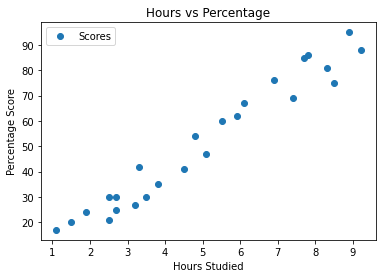

In [28]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [29]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [30]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20, 1) (20,)
Test set: (5, 1) (5,)


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


Text(0.5, 0, 'Hours')

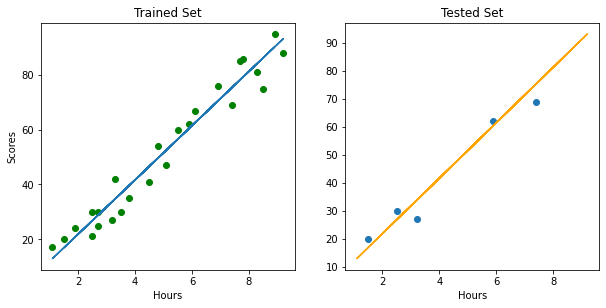

In [42]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

fig = plt.figure(figsize =(10,10))
mx1 = plt.subplot(221)
mx2 = plt.subplot(222)

mx1.scatter(X,y,color='g')
mx1.plot(X,line)
plt.show
mx1.set_title('Trained Set')
mx1.set_xlabel('Hours')
mx1.set_ylabel('Scores')

mx2.scatter(X_test, y_test)
mx2.plot(X_train, regressor.predict(X_train), c="orange")
mx2.set_title('Tested Set')
mx2.set_xlabel('Hours')

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [43]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


Text(0, 0.5, 'Scores')

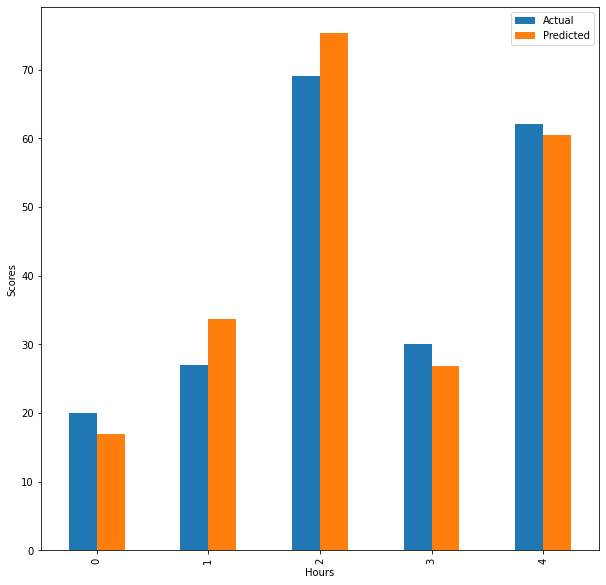

In [44]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df) 
df.plot(kind = 'bar', figsize=(10,10))
plt.xlabel('Hours')  
plt.ylabel('Scores')


In [ ]:
# You can also test with your own data
hours = float(input('Enter the no. of hours:'))


own_pred = regressor.predict([[hours]])

print("No of Hours = {}".format(hours))

print("Predicted Score = {}".format(own_pred[0]))


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
Rsq=regressor.score(X_train, y_train)
print("R square error is:",Rsq)

In [ ]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_pred)) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , y_pred)))